<a href="https://colab.research.google.com/github/LucioFassarella/AMQ/blob/main/Qiskit_AMQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QISKIT

---

<center><img align = "center" src="https://drive.google.com/uc?export=view&id=1zn4vH2Rd-JSB4tKEAqeBZ5mPbrQEmy7l" alt="grafo" width="500"></center>

<center>"You never understand things. You just get used to them." (John von Neumann)</center>


<font color = "yellow">**Qiskit**:</font>
*   [Python's Instalation](https://pypi.org/project/qiskit/)
*   [IBM Quantum cloud](https://quantum.cloud.ibm.com/)
    *   [Qiskit connect](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started) (IBM Runtime Service)
       *   [Getting Started](https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-get-started)
*   [Qiskit](https://docs.quantum.ibm.com/api/qiskit)
    *   [Qiskit Circuit Library](https://docs.quantum.ibm.com/api/qiskit/circuit_library)
    *   [Qiskit Gates Tutorial](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb)
    *   [List of Quantum Logic Gates](https://en.wikipedia.org/wiki/List_of_quantum_logic_gates)

[<font color="yellow">**Execution modes**</font>](https://quantum.cloud.ibm.com/docs/en/guides/execution-modes)
*	[Choose the execution mode](https://quantum.cloud.ibm.com/docs/en/guides/choose-execution-mode)
*   [Single Job](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples#estimator-examples)
*	[Batch mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-batch)
*	[Section mode](https://quantum.cloud.ibm.com/docs/en/guides/run-jobs-session)
*	[Primitives examples](https://quantum.cloud.ibm.com/docs/en/guides/primitives-examples)


[<font color="yellow">**Local simulators**</font>](https://quantum.cloud.ibm.com/docs/en/migration-guides/local-simulators)

---

# Aprendizado de Máquina Quântico



# QISKIT: Carregamento

In [3]:
!pip install qiskit -U
!pip install qiskit_aer -U
!pip install qiskit-ibm-runtime -U

!pip install matplotlib
!pip install pylatexenc

import qiskit
qiskit.__version__

'2.3.0'

In [4]:
# Qiskit: métodos básicos

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import transpile

from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city

# Perceptron Binário Quântico

Referências:
*   Fernanda B. S. Melo: <i>Redes Neurais Artificiais no Âmbito da Computação Quântica</i>. TCC - UFOP, João Molevade, 2023. URL: [https://www.monografias.ufop.br/bitstream/35400000/6305/3/MONOGRAFIA_RedesNeuraisArtificiais.pdf](https://www.monografias.ufop.br/bitstream/35400000/6305/3/MONOGRAFIA_RedesNeuraisArtificiais.pdf).
*   Francesco Tacchino, Chiara Macchiavello, Dario Gerace, Daniele Bajoni. <i>An artificial neuron implemented on an actual quantum processor</i>. npj Quantum Information, Nature Publishing Group, v. 5, n. 1, p. 26, 2019. DOI: 10.1038/s41534-019-0140-4. URL: [https://www.nature.com/articles/s41534-019-0140-4](https://www.nature.com/articles/s41534-019-0140-4).
*   Wei Hu. Towards a Real Quantum Neuron. Nat. Sci. 10, 99–109 (2018). DOI: 10.4236/ns.2018.103011. Url: [https://www.scirp.org/journal/paperinformation?paperid=83091](https://www.scirp.org/journal/paperinformation?paperid=83091).
*   E. Torrontegui, J. J. Garcia-Ripoll: <i>Unitary quantum perceptron as efficient universal approximator</i>. arXiv, 2018: arXiv:1801.00934. DOI: 10.1209/0295-5075/125/30004. Url: [https://arxiv.org/abs/1801.00934](https://arxiv.org/abs/1801.00934).
*   Yudong Cao, Gian Giacomo Guerreschi, Alán Aspuru-Guzik: <i>Quantum Neuron: an elementary building block for machine learning on quantum computers</i>. arXiv, 2017, arXiv:1711.11240. DOI: 10.48550/arXiv.1711.11240. Url: [https://arxiv.org/abs/1711.11240](https://arxiv.org/abs/1711.11240).
    *   <font color="green">"Our quantum circuit defines a building block, the 'quantum neuron', that can reproduce a variety of classical neural network constructions while maintaining the ability to process superpositions of inputs and preserve quantum coherence and entanglement. In the construction of feedforward networks of quantum neurons, we provide numerical evidence that the network not only can learn a function when trained with superposition of inputs and the corresponding output, but that this training suffices to learn the function on all individual inputs separately."</font>
*   Nathan Wiebe, Ashish Kapoor, Krysta M. Svore: <i>Quantum perceptron models</i>. arXiv preprint, 2016. DOI: 10.48550/arXiv.1602.04799. [arXiv:1602.04799, 2016](https://arxiv.org/abs/1602.04799).


---

<b>Modelo Clássico</b>

Dimensão do modelo:
$$
N = 2^n - 1.
$$
    
Dados de entrada binários:
$$
\vec{i} = \begin{pmatrix}
i_0\\
i_1\\
\vdots\\
i_{N - 1}
\end{pmatrix} \in \left\{ -1, 1 \right\}^N;
$$

pesos binários:
$$
\vec{\omega} =
\begin{pmatrix}
\omega_0\\
\omega_1\\
\vdots\\
\omega_{N - 1}
\end{pmatrix} \in \left\{ -1, 1 \right\}^N.
$$
A quantidade fundamental para calcular no Perceptron é o produto interno entre $\vec{i}$ e $\vec{\omega}$:

$$
 \vec{i} \cdot \vec{\omega} = \sum_{k=0}^{N-1}\omega_k i_k.
$$

<b>Quantização</b>
    
Estados de entrada e pesos (normalizados):
$$
|\psi_i \rangle = \frac{1}{\sqrt{N}}\sum_{k = 0}^{N-1} i_k | k \rangle,
$$
$$
|\psi_\omega \rangle = \frac{1}{\sqrt{N}}\sum_{j = 0}^{N-1} w_j | j \rangle.
$$

Assim:

$$
\begin{split}
\langle \psi_\vec{\omega} | \psi_\vec{i}\rangle &= \left( \frac{1}{\sqrt{N}}\sum_{k = 0}^{N-1} \omega_k \langle k |\right)%
\left(\frac{1}{\sqrt{N}}\sum_{j = 0}^{N-1} i_j | j \rangle\right)\\
&=  \frac{1}{N}\sum_{k,j = 0}^{N-1} \omega_k i_j \underbrace{\langle k | j \rangle}_{= \delta_{kj}} \\
&= \frac{1}{N}\sum_{k = 0}^{N-1} \omega_k i_k\\
&= \vec{i} \cdot \vec{\omega};
\end{split}
$$
portanto:
$$
\vec{i} \cdot \vec{\omega} = N \langle \psi_\vec{\omega} | \psi_\vec{i}\rangle.
$$

Para calcularmos no computador quântico o produto interno $\langle \psi_\vec{\omega} | \psi_\vec{i}\rangle$, precisamos preparar os estados $|\psi_\vec{\omega}\rangle$ e $ | \psi_\vec{i}\rangle$ - o que significa construir portas $U_\vec{i}$ e $U_\vec{\omega}$ tais que
$$
U_\vec{i} | 0 \rangle = | \psi_i \rangle;\ \ %
U_\vec{\omega} | 0 \rangle = | \psi_\omega \rangle.
$$
Com essas portas, temos:
$$
\langle \psi_\vec{\omega} | \psi_\vec{i}\rangle = \langle 0 | U_\vec{\omega}^\dagger U_\vec{i} | 0\rangle.
$$
Agora, o valor de $\langle \psi_\vec{\omega} | \psi_\vec{i}\rangle$ pode ser obtido da medida na base computacional do estado $U_\vec{\omega}^\dagger U_\vec{i} | 0\rangle$, visto que
$$
Prob(0\ |\ U_\vec{\omega}^\dagger U_\vec{i} | 0\rangle) = | \langle 0 | U_\vec{\omega}^\dagger U_\vec{i} | 0\rangle |^2,
$$
então podemos obter $\langle \psi_\vec{\omega} | \psi_\vec{i}\rangle$ a partir da medida na base computacional desse estado preparado:
$$
\langle \psi_\vec{\omega} | \psi_\vec{i}\rangle \approx N \sqrt{Prob(0\ |\ U_\vec{\omega}^\dagger U_\vec{i} | 0\rangle)}.
$$

+++

Como alternativa à medir os $n$ qubits do registro quântico para obtermos a probabilidade de um único estado da base computacional, podemos usar um qubit auxiliar para extrair essa informação mediante um emaranhamento adequado e subsequente medita desse único qubit auxiliar. Nesse caso, será interessante preparar o estado $| \psi_\vec{\omega}\rangle$ por uma porta $V_\vec{\omega}$ tal que
$$
| \psi_\vec{\omega} \rangle = V_\vec{\omega}^\dagger |N-1 \rangle,\ \ \  |N-1 \rangle = |1 \dots 1 \rangle.
$$
Dessa forma
$$
\langle \psi_\vec{\omega} | \psi_\vec{i}\rangle = \langle N - 1 | V_\vec{\omega} U_\vec{i} | 0\rangle.
$$
Acoplando um qubit auxiliar $a$ ao registro quântico principal temos, pela expansão de $V_\vec{\omega} U_\vec{i} | 0\rangle$ na base computacional:
$$
V_\vec{\omega} U_\vec{i} | 0\rangle \otimes |0 \rangle_a = \sum_{k=0^{N-1}}c_k| k\rangle \otimes |0 \rangle_a.
$$
Agora, aplicando a porta $X$ (NOT) ao qubit auxiliar controlada pelos qubits principais, temos:
$$
\begin{split}
\mathrm{CNOT} \left(V_\vec{\omega} U_\vec{i} | 0\rangle \otimes |0 \rangle_a\right) &= \sum_{k=0}^{N-1}c_k \mathrm{CNOT} (|k\rangle \otimes |0 \rangle_a)\\
&= \sum_{k=0}^{N-2}c_k |k\rangle \otimes |0 \rangle_a + c_{N-1}| N-1 \rangle \otimes |1 \rangle_a.
\end{split}
$$
Portanto:
$$
| \langle \psi_\vec{\omega} | \psi_\vec{i}\rangle |  = N| c_{N-1} | = N\sqrt{P(a = 1\ |\ \phi)},
$$
onde
$$
| \phi\rangle = \mathrm{CNOT} \left(V_\vec{\omega} U_\vec{i} | 0\rangle \otimes |0 \rangle_a\right).
$$

<b>Construção das Portas $U_\vec{i}$ e $V_\vec{\omega}$</b>

Como $\vec{i}$ e $\vec{\omega}$ são binários de $\left\{ -1, 1\right\}$, podemos construir as portas $U_\vec{i}$ e $V_\vec{\omega}$ mediante composição da porta Hadamard $H^{\otimes n}$ com os operadores de troca de sinal (<i>signal flip</i>):
$$
\mathrm{SF}_{N,k}| j \rangle := \left\lbrace
\begin{array}{ll}
+| j \rangle, & \text{se}\ j \neq k,\\
-| j \rangle, & \text{se}\ j = k.
\end{array}
\right.
$$
Explicitamente:
$$
\vec{i} \leadsto U_\vec{i} =\left( \prod_{%
\begin{array}{cc}
\ell = 0, \dots, n-1\\%
i_\ell = -1
\end{array}}
\mathrm{SF}_{N,\ell}\right) \circ H^{\otimes n}
$$
Analogamente, considerando que $\mathrm{SF_{N,k}}$ e $U_\vec{\omega}$ são hermitianos:
$$
\begin{split}
\vec{\omega} \leadsto U_\vec{\omega} &= V_\vec{\omega}^\dagger \circ X^{\otimes n} = \leadsto V_\vec{\omega} = X^{\otimes n} \circ U_\vec{\omega}^\dagger = = X^{\otimes n} \circ U_\vec{\omega} \ \ \ \ (U_\vec{\omega}^\dagger = U_\vec{\omega}) \\
&= X^{\otimes n} \circ H^{\otimes n} \circ
\left( \prod_{%
\begin{array}{cc}
\ell = 0, \dots, n-1\\%
\omega_\ell = -1
\end{array}}
\mathrm{SF}_{N,\ell}\right)
\end{split}
$$

**Construção eficiente dos operadores $SF$: via hipergrafos!**
⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬


# Estados de Hipergrafos

*   **Referência**: M. Rossi, M. Huber, D. Bruß, C. Macchiavello: <i>Quantum hypergraph states</i>. New Journal of Physics, Volume 15, 113022 (2013). DOI:10.1088/1367-2630/15/11/113022. URL: [https://iopscience.iop.org/article/10.1088/1367-2630/15/11/113022](https://iopscience.iop.org/article/10.1088/1367-2630/15/11/113022).


***

**Transformação hipergráfica**

Função zeta
$$
\zeta: \left\{0,1\right\} \rightarrow\left\{0,1\right\},\ \zeta(x) = 1 - x \therefore \left\lbrace %
\begin{array}{l}
\zeta(0) = \bar{0} := 1,\\
\zeta(1) = \bar{1} := 0.
\end{array}
 \right.
$$

Sejam $g = (V,E)$ um hipergrafo de cardinalidade $n \in \mathbb{N}$ com vértices $V$ e hiper-arestas $E$,

$$
V = \left\{0, 1, \dots, n-1 \right\},\ E \subseteq P(\left\{0, 1, \dots, n-1\right\}),
$$

e $f$ uma sequência booleana
$$
f = (f_0, f_1, \dots, f_{2^n-1}) \in \left\{0,1\right\}^{2^n}.
$$
A ação de $g$ em $f$ é definida por:
$$
g(f) \equiv f^g \in \left\{0,1\right\}^{2^n},
$$
onde:
*   $E = \left\{\left\{i\right\}\right\} \subset P(V)$ ($1$-hiperaresta)  $\therefore$
$$
g(f) \equiv f^g = (f^\left\{i\right\}_0, f^\left\{i\right\}_1, \dots, f^\left\{i\right\}_{2^n-1}),\ f^\left\{i\right\}_k:= \left\{
    \begin{array}{ll}
    \bar{f_\ell}, & \text{se}\ \mathrm{bin}(\ell)_i = 1,\\
    f_\ell, & \text{se}\ \mathrm{bin}(\ell)_i = 0.
    \end{array}
    \right.
$$
*   $E = \left\{\left\{i_0, \dots, i_{k-1}\right\}\right\}\subset P(V)$ ($k$-hiperaresta) $\therefore$
$$
g(f) \equiv f^g = (f^\left\{i_0, \dots, i_{k-1}\right\}_0, f^\left\{i_0, \dots, i_{k-1}\right\}_1, \dots, f^\left\{i_0, \dots, i_{k-1}\right\}_{2^n-1}),\ f^\left\{i_0, \dots, i_{k-1}\right\}_k:= \left\{
    \begin{array}{ll}
    \bar{f_\ell}, & \text{se}\ \mathrm{bin}(\ell)_{i_0} = \dots = \mathrm{bin}(\ell)_{i_{n-1}} = 1,\\
    f_\ell, & \lnot (\mathrm{bin}(\ell)_{i_0} = \dots = \mathrm{bin}(\ell)_{i_{n-1}} = 1).
    \end{array}
    \right.
$$
*   $E = \left\{ e_0, e_1, \dots , e_{m-1} \right\} \subseteq P(V)$ $\therefore$
$$
g(f) \equiv f^g = (\dots((f^{e_0})^{e_1}) \dots )^{e_{m-1}}.
$$

In [6]:
def HGrafo(f, E):
    '''
    Método que realiza a transformação hipergráfica de uma sequência booleana.

    Entradas
        n (int) : número de vértices do hipergrafo (n >= 1)
        f (list): lista booleana de comprimento 2**n, com entradas 0 ou 1.
        E (list): arestas do hipergrafo (lista de subconjuntos de Z[0,n-1])


    Saída
        g(f): transformação hipergráfica de f por g = (V,E), V = {0, 1, ..., n-1}.

    Método auxiliar:
        numpy

    Observação:
        Nenhuma hiperaresta muda o valor de f[0]. Quanticamente, a mudança do
        valor de f[0] pode ser realizada por uma fase global.
    '''

    # Testes de consistência nas entradas

    import numpy as np
    log2n = np.log2(len(f))
    n = int(np.log2(len(f)))
    if log2n - n != 0:
        print('Erro na entrada f: seu comprimento deve ser 2**n!')
        return None

    for edge in E:
        for vertex in edge:
            if vertex < 0 or vertex >= n:
                return print('Erro nas entradas n e E!')


    fg = f.copy()

    # Ação de k-hiperaresta

    def k_hiperaresta(edge, f):

        fg = f.copy()

        if [0] in edge:
            for k in range(2**n):
                fg[k] = 1 - fg[k]

        for k in range(2**n):
            digitos = [list(bin(k)[2:].zfill(n))[i] for i in range(n)]
            digitos.reverse()
            condicao = True
            for vertex in edge:
                if digitos[vertex] != '1':
                    condicao = False
                    break
            if condicao == True:
                fg[k] = 1 - fg[k]

        return fg

    # Ação do hipergrafo

    for edge in E:
        fg = k_hiperaresta(edge, fg)

    return fg

In [7]:
# EXEMPLO

## Criar o estado (0,0,1,0,1,0,1,0) a partir de (0,0,0,0,0,0,0,0)


f = [0,0,0,0,0,0,0,0]
print(f"f: {f}")
E = [[1],[2],[0,1],[0,2],[1,2],[0,1,2]]
print(f"E: {E}")
fg = HGrafo(f, E)
print(f"fg: {fg}")

print("ANULAR")

h = HGrafo(fg,E)
print(f"h: {h}")


CRIAR
n: 3
f: [0, 0, 0, 0, 0, 0, 0, 0]
E: [[1], [2], [0, 1], [0, 2], [1, 2], [0, 1, 2]]
fg: [0, 0, 1, 0, 1, 0, 1, 0]
ANULAR
h: [0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
def HGraforew(f):
    '''
    Método que constrói o hipergrafo que cria uma dada sequência booleana a partir
    da sequência booleana nula.

    Entradas
        n (int) : número de vértices do hipergrafo (n >= 1)
        f (list): lista booleana de comprimento 2**n, com entradas 0 ou 1.


    Saída
        E (list): lista de arestas (subconjuntos de V = {0, 1, ..., n-1}).
    '''

    # Testes de consistência nas entradas

    import numpy as np
    log2n = np.log2(len(f))
    n = int(np.log2(len(f)))
    if log2n - n != 0:
        print('Erro na entrada f: seu comprimento deve ser 2**n!')
        return None

    # Construção da lista

    if n <= 0: # Caso n <= 0
        print("Erro na entrada n!")
        return None

    elif n == 1: # Caso n = 1
        if f[1] == 0:
            return []
        elif f[1] == 1:
            return [[0]]
        else:
            print("Erro na entrada f!")
            return None

    else: # Caso n > 1
        if f[2**(n-1)] == 0: # Ação no qubit 'n-1', correspondente ao zerésimo termo da segunda metade de f
            E = []
            fg = f.copy()
        elif f[2**(n-1)] == 1:
            E = [[n-1]]
            fg = HGrafo(f,E)

        f0 = fg[0:2**(n-1)] # Divisão da lista em duas partes
        f1 = fg[2**(n-1):]

        # Recursividade

        E0 = HGraforew(f0)

        if E0 is None: # Propaga erro
            return None

        f11 = HGrafo(f1,E0)
        if f11 is None: # Propaga erro
            return None

        E1 = HGraforew(f11)
        if E1 is None: # Propaga erro
            return None

        for edge in E1:
            edge.append(n-1)

        E = E + E0 + E1
        return E

In [12]:
# EXEMPLO

f = [0,1,0,0]
print(f"f: {f}. len(f): {len(f)}")

E = HGraforew(f)
#E = [[0,1,2]]
print(f"E: {E}")

fg = HGrafo(f, E)
print(f"fg: {fg}")

f: [0, 1, 0, 0]. len(f): 4
E: [[0], [0, 1]]
fg: [0, 0, 0, 0]


In [13]:
# EXEMPLO

f = [0,0,0,1]
print(f"f: {f}. len(f): {len(f)}")

E = HGraforew(f)
#E = [[0,1,2]]
print(f"E: {E}")

fg = HGrafo(f, E)
print(f"fg: {fg}")

f: [0, 0, 0, 1]. len(f): 4
E: [[0, 1]]
fg: [0, 0, 0, 0]


In [14]:
def Rew(f):
    '''
    Método que constrói o circuito que prepara o estado REW associado à sequência booleana

    Entradas:
        n (int) : número de vértices do hipergrafo (n >= 1)
        f (list): lista booleana de comprimento 2**n, com entradas 0 ou 1.


    Saída:
        QuantumCircuit: circuito quântico que prepara o estado REW associadao a 'f'.

    Métodos auxiliares:
        HGraforew(n,f): constrói o hipergrafo que cria uma dada sequência booleana a partir
        da sequência booleana nula.
        qiskit.circuit.library.standard_gates.ZGate
    '''

    # Testes de consistência nas entradas

    import numpy as np
    log2n = np.log2(len(f))
    n = int(np.log2(len(f)))
    if log2n - n != 0:
        print('Erro na entrada f: seu comprimento deve ser 2**n!')
        return None

    # Criação do hipergrafo que gera f

    E = HGraforew(f)
    if E is None: # Propaga erro
        return None

    # Criação do circuito

    qc = QuantumCircuit(n)
    for k in range(n):
        qc.h(k)

    if E == []:
        return qc

    else:

        from qiskit.circuit.library.standard_gates import ZGate

        for edge in E:
            if len(edge) == 1:
                qc.z(edge[0])
            else:
                cz_gate_edge = ZGate().control(len(edge)-1)
                qc.append(cz_gate_edge, edge)
        return qc

f: [0, 0, 1, 0, 1, 0, 1, 0]. len(f): 8
E: [[2], [1], [0, 1], [1, 2], [0, 2], [0, 1, 2]]


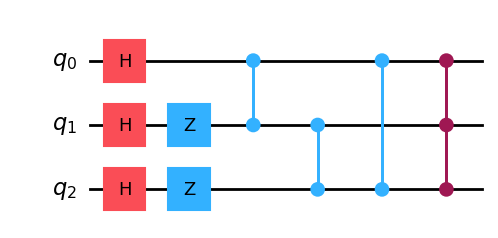

<IPython.core.display.Latex object>

In [15]:
# EXEMPLO

f = [0,0,1,0,1,0,1,0]
print(f"f: {f}. len(f): {len(f)}")

E = HGraforew(f)
print(f"E: {E}")

qc = Rew(f)

display(qc.draw('mpl'))

# Print do estado preparado

from qiskit.quantum_info import Statevector

estado = Statevector.from_instruction(qc)
estado.draw('latex')

In [ ]:
def qiskit_sampler(circuito_com_medidas, shots = None, backend = None):
    '''
    Método para executar o Sampler
    >>> O Sampler realiza medidas em circuitos quânticos e retorna a contagem de qubits.
        A partir dos resultados do Sampler, podemos estimar as probabilidade de cada resultado.

    Input:
        circuito : circuito quântico que prepara um estado de qubits
        backend  : backend para rodar o Sampler

    Saída:
        resultado do Sampler

    Observação: os resultados do Sampler são rotulados pelo nomes dos registros clássicos.
                Para um circuito com medidas definidas por 'measure_all', o rótulo é 'meas'.
                Para circuitos com medidas definidas de início sem denominação explícita,
                os rótulos são 'c', 'c1', 'c2', etc.

    Tutorial do Sampler: https://quantum.cloud.ibm.com/docs/en/api/qiskit-ibm-runtime/sampler-v2
    '''

    # Importação de métodos e backend

    from qiskit_ibm_runtime import SamplerV2 as Sampler

    if backend is None:
        from qiskit_ibm_runtime.fake_provider import FakeBrisbane
        backend = FakeBrisbane()
    else:
        backend = backend

    from qiskit.transpiler import generate_preset_pass_manager
    pm = generate_preset_pass_manager(optimization_level=2, backend = backend)

    # Transpilação

    isa_circuitos = pm.run(circuito_com_medidas)
    #display(isa_circuitos.draw('mpl'))

    if shots is None:
        shots = 2**10
    else:
        shots = shots

    sampler = Sampler(backend)
    job = sampler.run([(isa_circuitos, )], shots = shots)
    result = job.result()

    # Identificação do nome do primeiro registro clássico
    classical_register_name = isa_circuitos.cregs[0].name
    counts = result[0].data[classical_register_name].get_counts()

    return counts, result

In [16]:
from qiskit.quantum_info import Statevector


def Qprod(f,h, shots, backend = None):
    '''
    Método que realiza o produto vetorial de duas sequências booleanas.

    Entradas:
        f (list): lista booleana de comprimento 2**n, com entradas 0 ou 1.
        h (list): lista booleana de comprimento 2**n, com entradas 0 ou 1.
        shots (int): número de medições.

    Saída:
        qprod (float): produto vetorial de f e h.

    Métodos auxiliares:
        HGraforew(n,f): método que constrói o hipergrafo que cria uma dada
            sequência booleana a partir da sequência booleana nula

        HGrafo(n, f, E): método que realiza a transformação hipergráfica de uma
            sequência booleana.

        HGraforew(n,f): método que constrói o hipergrafo que cria uma dada
            sequência booleana a partir da sequência booleana nula.

        Rew(n,f): método que constrói o circuito que prepara o estado REW
    '''

    # Teste de consistência dos dados de entrada

    import numpy as np
    log2n = np.log2(len(f))
    n = int(np.log2(len(f)))
    if log2n - n != 0:
        print('Erro na entrada f: seu comprimento deve ser 2**n!')
        return None
    elif len(f) != len(h):
        print('Erro na entrada h: seu comprimento deve ser igual ao de f!')
        return None

    # Criação do circuito que prepara U_f e V_h

    qc = QuantumCircuit(n+1,1)

    qcf = Rew(f)
    if qcf is None: # Propaga erro
        return None

    qc.compose(qcf, range(n), inplace = True)

    # display(qc.draw('mpl'))
    # statevector = Statevector.from_instruction(qc)
    # print("Rew(f)") #########################################
    # display(statevector.draw('latex'))

    qch = Rew(h)
    if qch is None: # Propaga erro
        return None
    # display(qch.draw('mpl'))

    qch_dagger = qch.inverse()

    qc.compose(qch_dagger, range(n), inplace = True)

    for k in range(n):
        qc.x(k)

    from qiskit.circuit.library.standard_gates import XGate

    cz_gate = XGate().control(n)

    qc.append(cz_gate, range(n+1))

    qc_aux = qc.copy()

    qc.measure(n,[0])

    display(qc.draw('mpl')) ############################## CIRCUITO IMPRESSÃO
    statevector = Statevector.from_instruction(qc_aux)
    display(statevector.draw('latex'))

    # Medida

    # counts, _ = qiskit_sampler(qc,shots, backend) # Unpack the tuple
    # print(counts)

    # Calculate prod from the counts
    # Use .get('1', 0) to handle cases where '1' might not be in the counts (i.e., its probability is 0)
    #prod = (2**n)*np.sqrt(counts.get('1', 0)/shots)

    from qiskit_aer import AerSimulator

    simulator = AerSimulator()

    job = simulator.run(qc, shots= shots)
    result = job.result()

    counts = result.get_counts(qc)

    prod = (2**n)*np.sqrt(counts.get('1', 0)/shots)

    print("\nTotal counts:", counts)

    return prod, qc_aux

f: [0, 0]. len(f): 2
h: [0, 1]. len(h): 2
f*h: 0


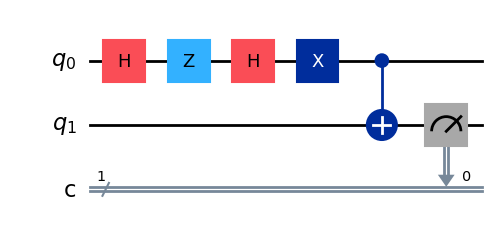

<IPython.core.display.Latex object>


Total counts: {'0': 1024}
qprod: (np.float64(0.0), <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f96617d2e10>)
Produto interno: 0.0


In [18]:
# EXEMPLO 1

n = 1

f = [0,0]
print(f"f: {f}. len(f): {len(f)}")

h = [0,1] # [1,1,0,1,0,1,0,1] #[1,1,1,0,1,0,0,0] #f.copy()
print(f"h: {h}. len(h): {len(h)}")

prod = 0
for k in range(2**n):
    prod += ((-1)**f[k])*((-1)**h[k])
print(f"f*h: {prod}")

qprod = Qprod(f,h, 2**10)
print(f"qprod: {qprod}")
print(f"Produto interno: {qprod[0]}")

f: [0, 0, 1, 0]. len(f): 4
h: [0, 1, 0, 0]. len(h): 4
f*h: 0


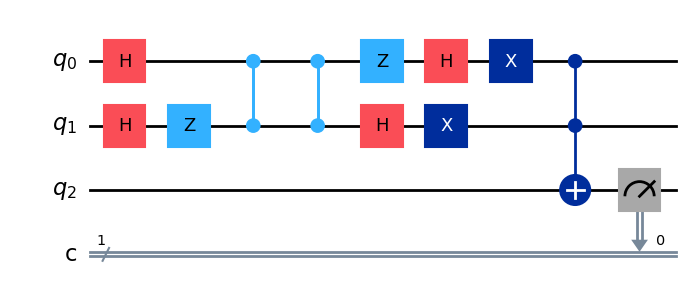

<IPython.core.display.Latex object>


Total counts: {'0': 1024}
qprod: (np.float64(0.0), <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f9661938740>)


In [19]:
# EXEMPLO

n = 2

f = [0,0,1,0]
print(f"f: {f}. len(f): {len(f)}")

h = [0,1,0,0] # [1,1,0,1,0,1,0,1] #[1,1,1,0,1,0,0,0] #f.copy()
print(f"h: {h}. len(h): {len(h)}")

prod = 0
for k in range(2**n):
    prod += ((-1)**f[k])*((-1)**h[k])
print(f"f*h: {prod}")

qprod = Qprod(f,h, 2**10)
print(f"qprod: {qprod}")

f: [0, 0, 1, 0, 1, 0, 1, 0]. len(f): 8
h: [0, 1, 1, 1, 0, 1, 1, 1]. len(h): 8
f*h: -2


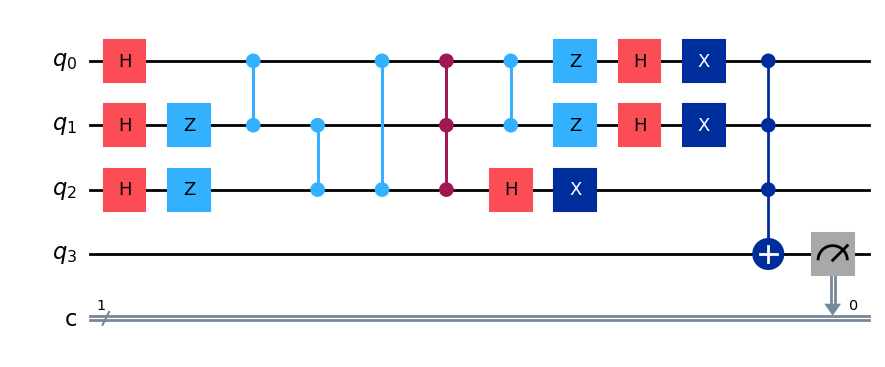

<IPython.core.display.Latex object>


Total counts: {'1': 66, '0': 958}
qprod: (np.float64(2.03100960115899), <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f965fb91490>)


In [20]:
# EXEMPLO

n = 3

f = [0,0,1,0,1,0,1,0]
print(f"f: {f}. len(f): {len(f)}")

h = [0,1,1,1,0,1,1,1] # [1,1,0,1,0,1,0,1] #[1,1,1,0,1,0,0,0] #f.copy()
print(f"h: {h}. len(h): {len(h)}")

prod = 0
for k in range(2**n):
    prod += ((-1)**f[k])*((-1)**h[k])
print(f"f*h: {prod}")

qprod = Qprod(f,h, 2**10)
print(f"qprod: {qprod}")